<a href="https://colab.research.google.com/github/SHAGGY670/ongoing/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><u> Exploratory Data Analysis</u> </center>

## 1. Importing the necessary libraries

Import the libraries that will be used in this notebook

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## 2. Download the dataset and load into dataframe

<p style='text-align: right;'> 5 points</p>


Please download the dataset from [here](https://www.kaggle.com/CooperUnion/cardataset) and extract the csv file. Load the csv file as pandas dataframe. 

In [40]:
## load the csv file 
data= pd.read_csv("data.csv")

In [41]:
## print the head of the dataframe
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


## 3. Check the datatypes

<p style='text-align: right;'> 2 points</p>


In [42]:
# Get the datatypes of each columns number of records in each column.
for names,dtype in data.dtypes.iteritems():
  print(names,dtype)

Make object
Model object
Year int64
Engine Fuel Type object
Engine HP float64
Engine Cylinders float64
Transmission Type object
Driven_Wheels object
Number of Doors float64
Market Category object
Vehicle Size object
Vehicle Style object
highway MPG int64
city mpg int64
Popularity int64
MSRP int64


## 4. Dropping irrevalent columns

Reference:-https://www.youtube.com/watch?v=cRurWEfmxC0
<p style='text-align: right;'> 5 points</p>


Not all the columns are important to us in the given dataframe, and hence we would drop the columns that are irrevalent to us. <br>

The list cols_to_drop contains the names of the cols that are irrevalent, drop all these cols from the dataframe

cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]

In [43]:
# initialise cols_to_drop
cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]

In [44]:
# drop the irrevalent cols and print the head of the dataframe
data.drop(cols_to_drop,axis=1)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


## 5.  Renaming the columns

<p style='text-align: right;'> 5 points</p>


We have already dropped the unneccesary columns, and now we are left with useful columns. One extra thing that we would do is to rename the columns such that the name clearly represents the essence of the column.

The given dict represents (in key value pair) the previous name, and the new name for the dataframe columns

In [45]:
rename_cols = {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", 
               "Driven_Wheels": "Drive Mode","highway MPG": "MPG_H", "city mpg": "MPG-C", "MSRP": "Price" }

In [46]:
# use a pandas function to rename the current columns with names in rename_cols 
data.rename(columns=rename_cols,inplace=True)


In [47]:
# Print the head of the dataframe

data.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG_H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 6. Dropping the duplicate rows

Reference: https://www.youtube.com/watch?v=bFVMR1qfzXo
<p style='text-align: right;'> 10 points</p>


There are many rows in the dataframe which are dublicate, and hence they are just repeating the information. Its better if we remove these rows as they don't add any value to the dataframe. 

For given data, we would like to see how many rows were duplicates. For this, we will count the number of rows, remove the dublicated rows, and again count the number of rows.

In [48]:
# number of rows before removing duplicated rows
data.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11914, dtype: bool

In [49]:
# drop the duplicated rows and print its head
data=data.drop_duplicates(subset=None, keep='first', inplace=False)
data.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG_H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [15]:
# Count Number of rows after deleting duplicated rows
index=data.index
print(len(index))


11199


## 7. Dropping the null or missing values 



<p style='text-align: right;'> 10 points</p>


There are many values which are missing, in pandas dataframe these values are reffered to as np.nan. We want to deal with these values beause we can't use nan values to train models. Either we can remove them to apply some strategy to replace them with other values.

To keep things simple we will be dropping nan values

In [50]:
# check for total nan values in each columns
data.isnull().sum()

Make                   0
Model                  0
Year                   0
Engine Fuel Type       3
HP                    69
Cylinders             30
Transmission           0
Drive Mode             0
Number of Doors        6
Market Category     3376
Vehicle Size           0
Vehicle Style          0
MPG_H                  0
MPG-C                  0
Popularity             0
Price                  0
dtype: int64

In [51]:
# drop missing values from df
data=data.dropna()

In [52]:
# Make sure that missing values are removed
# check total nan values in each col again
data.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Market Category     0
Vehicle Size        0
Vehicle Style       0
MPG_H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

In [53]:
#Describe statistics of df
data.describe()

,Year,HP,Cylinders,Number of Doors,MPG_H,MPG-C,Popularity,Price
count,7735.00000,7735.000000,7735.000000,7735.000000,7735.00000,7735.000000,7735.000000,7.735000e+03
mean,2012.14958,277.632062,5.825469,3.421332,26.52980,19.468649,1513.098772,5.102826e+04
std,6.23167,115.529955,1.895593,0.895054,7.78492,7.231534,1429.197317,7.153777e+04
min,1990.00000,55.000000,0.000000,2.000000,12.00000,7.000000,2.000000,2.000000e+03
25%,2010.00000,194.000000,4.000000,2.000000,22.00000,16.000000,520.000000,2.622500e+04
50%,2015.00000,270.000000,6.000000,4.000000,26.00000,18.000000,1013.000000,3.560000e+04
75%,2016.00000,325.000000,6.000000,4.000000,30.00000,22.000000,2009.000000,4.947750e+04
max,2017.00000,1001.000000,16.000000,4.000000,354.00000,137.000000,5657.000000,2.065902e+06


## 8. Removing outliers


Reference: https://www.youtube.com/watch?v=yxTRB0boTVg

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

### Detecting outliers

There many techiniques to detect outliers. Let us first see the simplest form of visualizing outliers.

Box plots are a graphical depiction of numerical data through their quantiles. It is a very simple but effective way to visualize outliers. Think about the lower and upper whiskers as the boundaries of the data distribution. Any data points that show above or below the whiskers, can be considered outliers or anomalous.

<p style='text-align: right;'> 15 points</p>


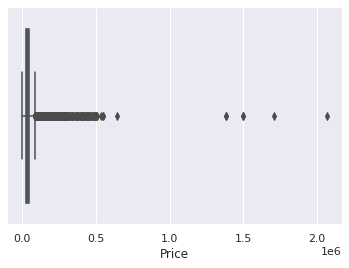

In [54]:
## Plot a boxplot for 'Price' column in dataset. 
sns.boxplot(x=data['Price'])

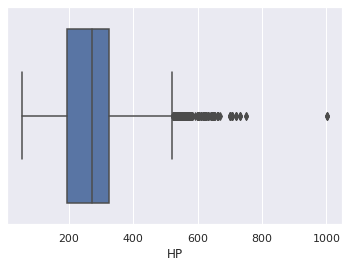

In [55]:
## PLot a boxplot for 'HP' columns in dataset
sns.boxplot(x=data['HP'])

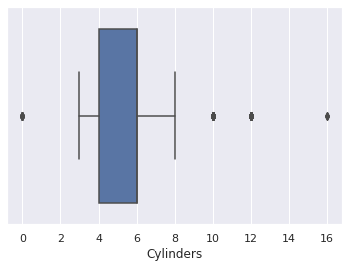

In [56]:
## Plot a boxplot for 'Cylinders' column in dataset
sns.boxplot(x=data['Cylinders'])

print all the columns which are of int or float datatype in df. 

Hint: Use loc with condition

In [57]:
#code here
data.loc[]

SyntaxError: ignored

Save the column names of the above output in variable list named 'l'


In [58]:
#code here
ic=data.select_dtypes(include=['int64']).columns
fc=data.select_dtypes(include=['float64']).columns


### Outliers removal techniques

Reference: https://www.youtube.com/watch?v=A3gClkblXK8
<p style='text-align: right;'> 25 points</p>

1. **Using IQR Technique**
 

**Here comes cool Fact for you!**

IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

The anatomy of boxplot is given below.

![image.png](attachment:image.png)

- Calculate IQR  and give a suitable threshold to remove the outliers and save this new dataframe into df2.

Let us help you to decide threshold: Outliers in this case are defined as the observations that or below (Q1 − 1.5x IQR) and above (Q3 + 1.5x IQR)

In [59]:
## Your code here

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   6.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG_H                  8.0
MPG-C                  6.0
Popularity          1489.0
Price              23252.5
dtype: float64


2. **Outlier removal using Z-score function**

Reference:- https://www.youtube.com/watch?v=rfmfXa0kdrQ
  - The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points.

We will use Z-score function defined in scipy library to detect the outliers in dataframe df having columns which are in variable 'l'


In [60]:
# calculate absolute zscore values for each columns present in l, save it in variable z. Print z

for col in ic:
    col_zscore = col + "_zscore"
    ic[col_zscore] = (ic[col] - ic[col].mean())/ic[col].std(ddof=0)
ic.head()

IndexError: ignored

Hey buddy! do you understand the above output? Difficult right? let’s try and define a threshold to identify an outlier so that we get a clear picture of whats going on.

We will not spare you without a good fact! ;)

In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [ ]:
# print the values in dataframe which are less than the threshold and save this dataframe as df3


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


print the shape difference of df df2 and df3. 

(10827, 10)
(9191, 10)
(10338, 10)


Interesting right? Bam! you have removed 489 rows from the dataframe which was detected as outlier by Z-score technique.
and removed 1636 rows from the dataframe which was detected as outlier by IQR technique.

By the way there are many other techniques by which you can remove outliers. You can explore on more interesting techniques
available.

We know you must be having many questions in you mind like:
- Which technique we should use and why?
- Is it neccessary that whatever detected as outlier are really outliers?

Dont't worry these delimma is faced my many data analyst. We provide you with good references below for you to explore further on this

- https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/
- https://www.researchgate.net/post/Which-is-the-best-method-for-removing-outliers-in-a-data-set

Lets find unique values and there counts in each column in df using value counts function.

Reference: https://www.youtube.com/watch?v=8wRfskrpTIk

In [ ]:
#Replicate the below output



--------------- Make ----------------
Chevrolet        1043
Ford              798
Toyota            651
Volkswagen        563
Nissan            540
Dodge             513
GMC               475
Honda             429
Cadillac          396
Mazda             392
Mercedes-Benz     340
Suzuki            338
Infiniti          326
BMW               324
Audi              320
Hyundai           254
Acura             246
Volvo             241
Subaru            229
Kia               219
Mitsubishi        202
Lexus             201
Chrysler          185
Buick             184
Pontiac           163
Lincoln           152
Porsche           134
Land Rover        126
Oldsmobile        111
Saab              101
Aston Martin       91
Bentley            74
Ferrari            69
Plymouth           62
Scion              60
FIAT               58
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo      

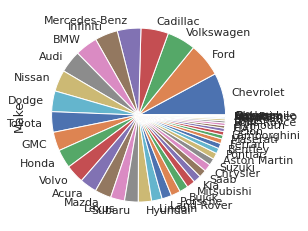

In [61]:
# Plot a pie chart to visualise unique value counts in column 'Make' using matplotlib

data['Make'].value_counts().plot(kind='pie')


## Visualising Univariate Distributions

Reference:-https://www.youtube.com/watch?v=lI5-7rX3xPY

We will use seaborn library to visualize eye catchy univariate plots. 

Do you know? you have just now already explored one univariate plot. guess which one? Yeah its box plot.


### 1 . Histogram & Density Plots

<p style='text-align: right;'> 15 points</p>

Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The ```sns.distplot()``` function plots a density curve. Notice that this is aesthetically better than vanilla ```matplotlib```.

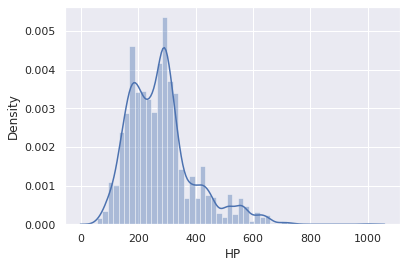

In [62]:
#ploting distplot for variable HP
sns.distplot(data["HP"])

Since seaborn uses matplotlib behind the scenes, the usual matplotlib functions work well with seaborn. For example, you can use subplots to plot multiple univariate distributions.
- Hint: use matplotlib subplot function

Reference:- https://www.youtube.com/watch?v=Tf-dgRR1PMA

In [63]:
# plot all the columns present in list l together using subplot of dimention (2,3).
data.subplots(4,3)


AttributeError: ignored

## 2. Bar plots

<p style='text-align: right;'> 10 points</p>


Plot a histogram depicting the make in X axis and number of cars in y axis. <br>

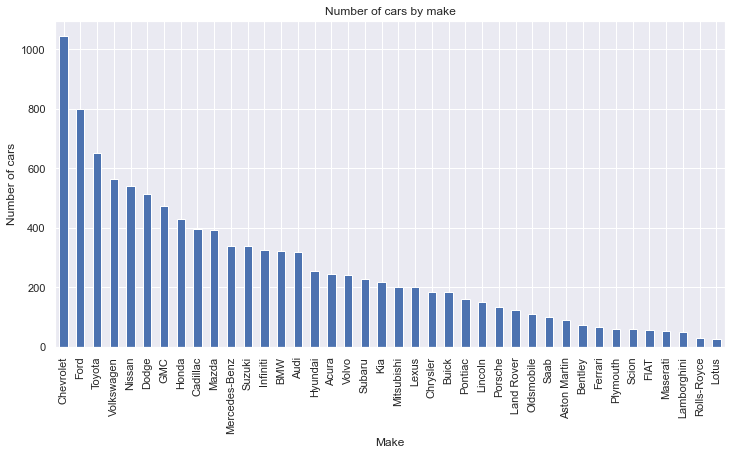

In [ ]:
#replicate below chart keeping nlargest as 40 and figsize as (12,6)




### 3. Count Plot

Reference:-https://www.youtube.com/watch?v=8U5h3EJuu8M

<p style='text-align: right;'> 10 points</p>

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.


 Plot a countplot for a variable Transmission vertically with hue as Drive mode

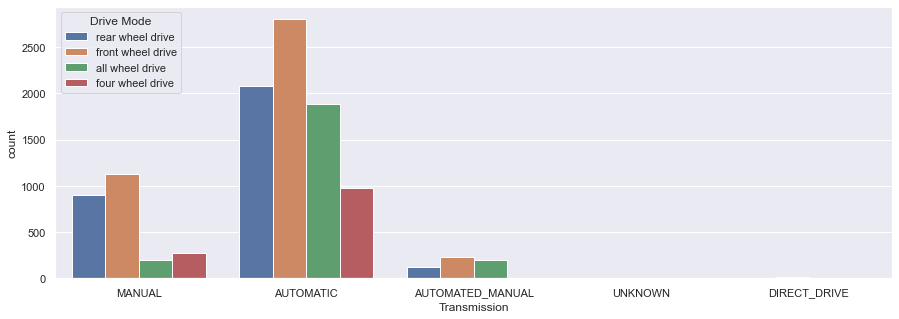

# Visualising Bivariate Distributions


Bivariate distributions are simply two univariate distributions plotted on x and y axes respectively. They help you observe the relationship between the two variables.




## 1. Scatterplots
Reference:- https://www.youtube.com/watch?v=Is9bc-WA-c8

Scatterplots are used to find the correlation between two continuos variables. <br>
<p style='text-align: right;'> 10 points</p>

Using scatterplot find the correlation between 'HP' and 'Price' column of the data. 



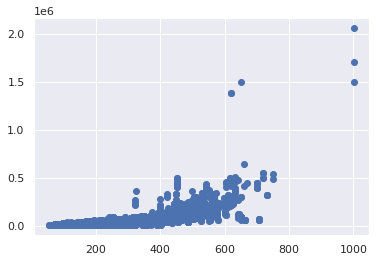

In [64]:
## Your code here - 
plt.scatter(x=data['HP'],y=data['Price'])
plt.show()


## 2. Lineplot 

Reference: https://www.youtube.com/watch?v=CMRVEKf9jWA

<p style='text-align: right;'> 10 points</p>


Plot a lineplot where x axis is 'HP' and y axis show 'Price'
Size of graph - (10,5)



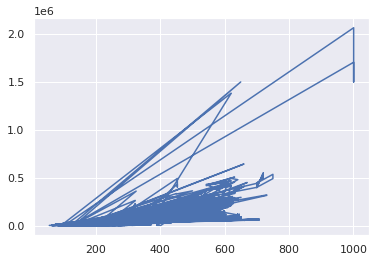

In [66]:

plt.plot(data['HP'],data['Price'])


Optional Question: - What happens to Price as we increase HP? is the trend linear?

## 3. Box plot w.r.t various variables

Reference:- https://www.youtube.com/watch?v=KoTHJPzpw0c

<p style='text-align: right;'> 20 points</p>


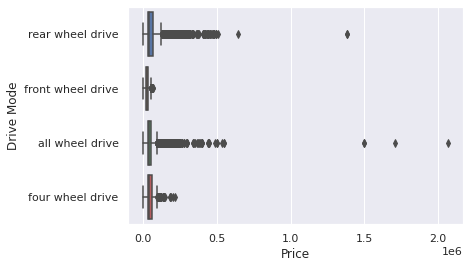

In [68]:
# Plot boxplot of 'Price' across various 'Drive Mode'

sns.boxplot(x=data['Price'],y=data['Drive Mode'])

Try to understand the above plot. Let us help you to understand it. This chart tells you that the Price of front wheel drive, on an average, lower than the other three categories. 

Let's now plot the other important variable - 'Transmission'

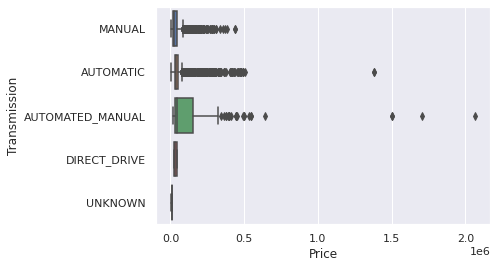

In [69]:
# plot boxplot of 'Price' across various 'Transmission'
sns.boxplot(data['Price'],data['Transmission'])



Hey Techie!, just give a try to explain what insight do you get from the above chart.


In [ ]:
#### comment below


You can **visualise the distribution across two categorical variables** using the ```hue= ``` argument.

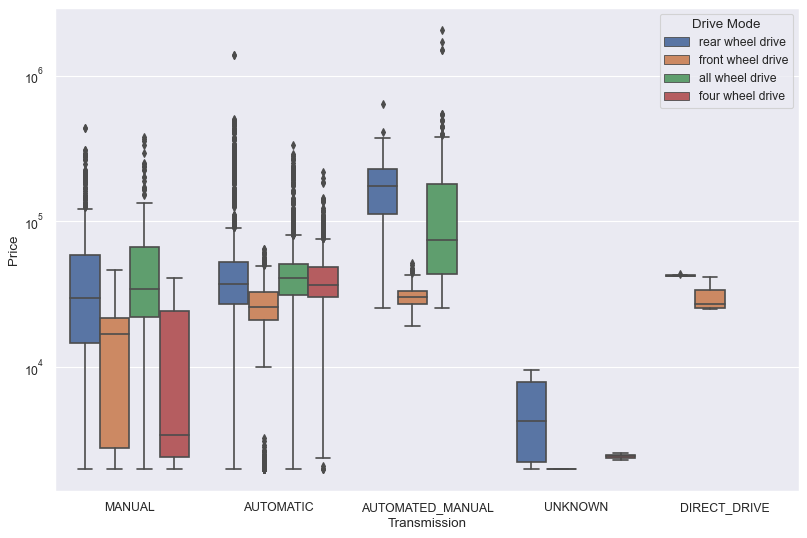

In [ ]:
# plot a boxplot with Transmission on x axis and Price on y axis. along with huw as Drive mode
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')



Wow!! If you have plotted this for first time then this plot might look very complicated. But no, its shows some really simple and interesting insights.
Can you help us what do you think about the above chart.
Please comment below:

In [ ]:
#Comment


## 4. joint distributions

Reference:-https://www.youtube.com/watch?v=LrSLBbe6pGY
<p style='text-align: right;'> 30 points</p>


Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid


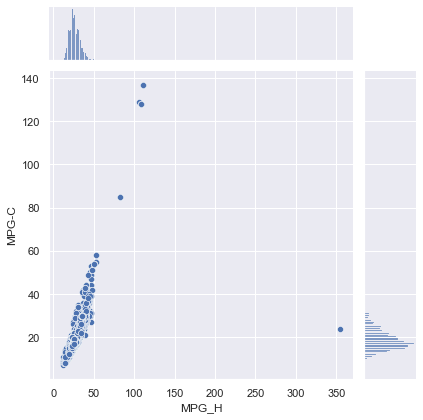

In [ ]:
# joint plots of MPG_H and MPG-C



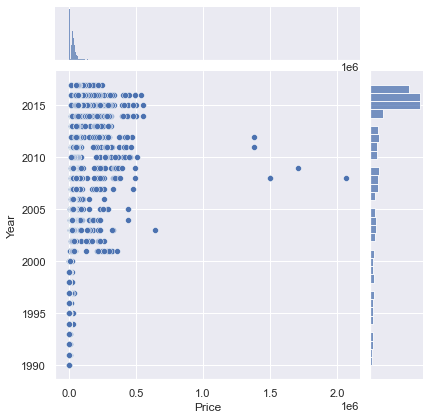

In [ ]:
# joint plots of Price and Year



You can adjust the arguments of the jointplot() to make the plot more readable. For e.g. specifying kind=hex will create a 'hexbin plot'.

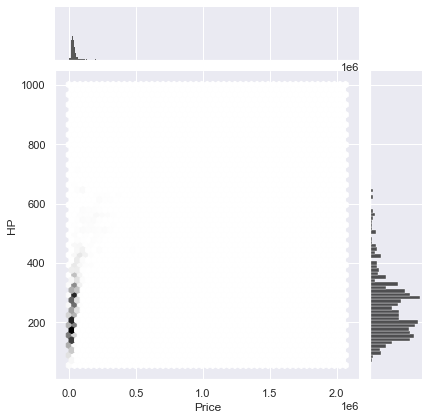

In [ ]:
# plotting hex plot for Prize and HP
# hex plot


## 5. Plotting Aggregated Values across Categories

Reference:-https://www.youtube.com/watch?v=yWYWmeuH7no

### Bar Plots - Mean, Median and Count Plots

<p style='text-align: right;'> 30 points</p>



Bar plots are used to **display aggregated values** of a variable, rather than entire distributions. This is especially useful when you have a lot of data which is difficult to visualise in a single figure. 

For example, say you want to visualise and *compare the Price across Cylinders*. The ```sns.barplot()``` function can be used to do that.


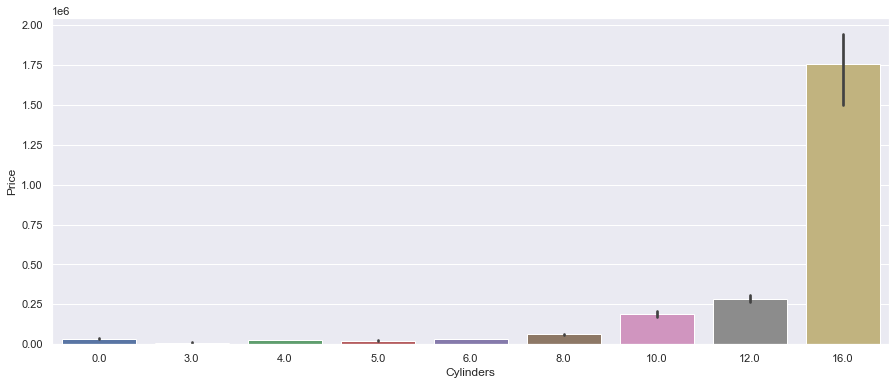

In [ ]:
# bar plot with default statistic=mean between Cylinder and Price



Hey you smarty!!. An Amazing fact for you:
Note that, **by default, seaborn plots the mean value across categories**, though you can plot the count, median, sum etc. Also, barplot computes and shows the confidence interval of the mean as well.



When you want to visualise having a large number of categories, it is helpful to plot the categories across the y-axis. Let's now *drill down into Transmission sub categories*. 

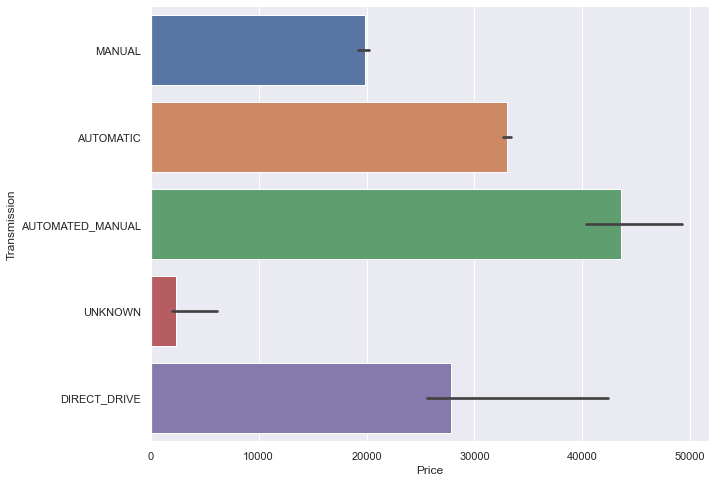

In [ ]:
# Plotting categorical variable Transmission across the y-axis



Plot bar plot for Price and Transmission with hue="Drive Mode"


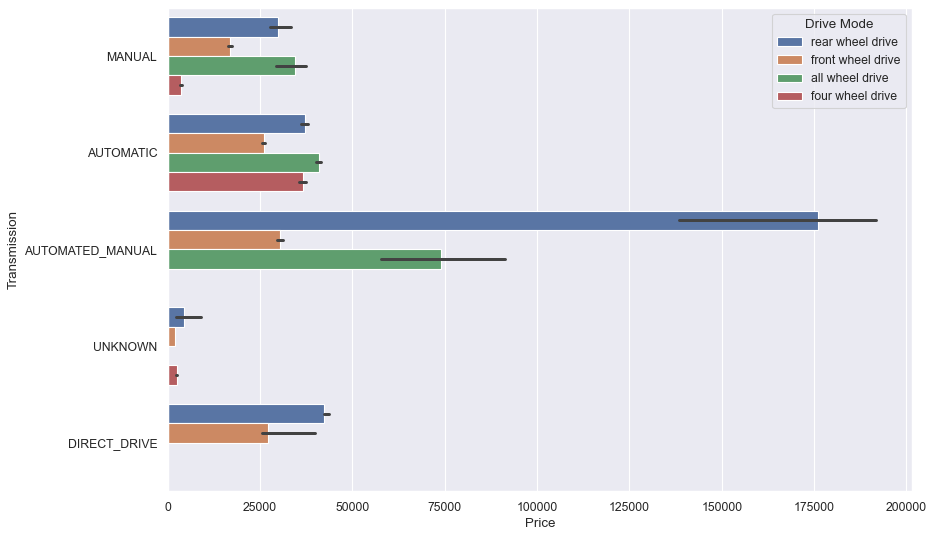

In [ ]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="Drive Mode"


These plots looks beutiful isn't it? In Data Analyst life such charts are there unavoidable friend.:)

# Multivariate Plots



# 1. Pairplot

Refrence:- https://www.youtube.com/watch?v=TexdD7t0IKU

<p style='text-align: right;'> 10 points</p>

Plot a pairplot for the dataframe df. 



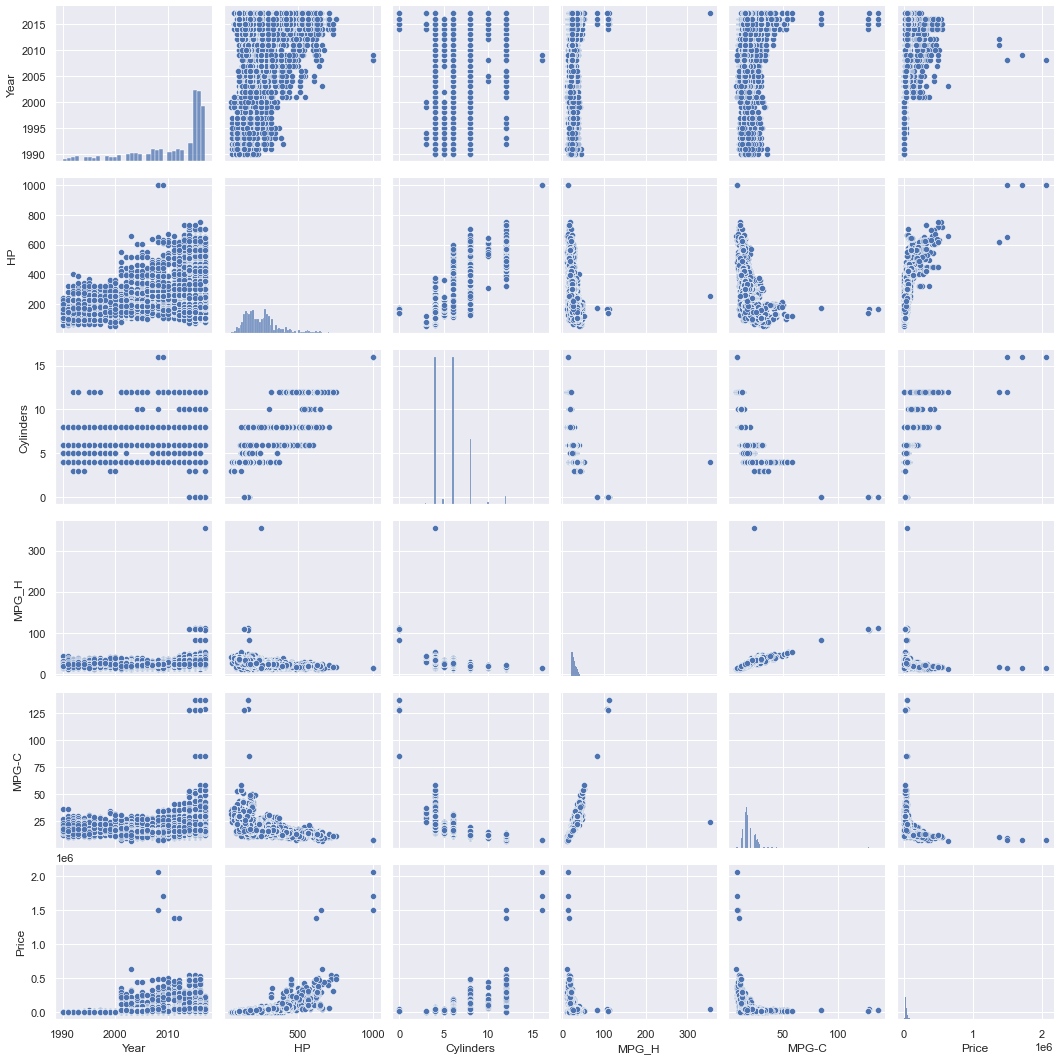

## 2. Multivariate scatter plots

<p style='text-align: right;'> 10 points</p>

This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

plot multivariate scatter plot using lmplot function of seaborn between HP and Price using hue as Transmission keeping fit_reg False.

<Figure size 1080x360 with 0 Axes>

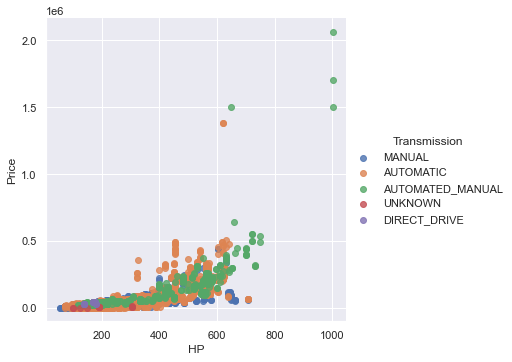

In [ ]:
plt.figure(figsize=(15,5))


Seems so interesting plot. You can clearly see in above output that the cost price increases for automated_manual transmission cars gradually

## 3. Parallel Coordinates

Reference:-https://www.youtube.com/watch?v=QVBQdS-uL_I

<p style='text-align: right;'> 20 points</p>


A parallel coordinates plot provides another way of visualizing data across many variables.

In a Parallel Coordinates Plot, each variable is given its own axis and all the axes are placed in parallel to each other. Each axis can have a different scale, as each variable works off a different unit of measurement, or all the axes can be normalised to keep all the scales uniform. Values are plotted as a series of lines that connected across all the axes. This means that each line is a collection of points placed on each axis, that have all been connected together.


In [ ]:
#copy l into another variable l1 and remove Price 'element' from  l1


Plot a parallel plot with columns present in l1 in df with respect to Cylinders

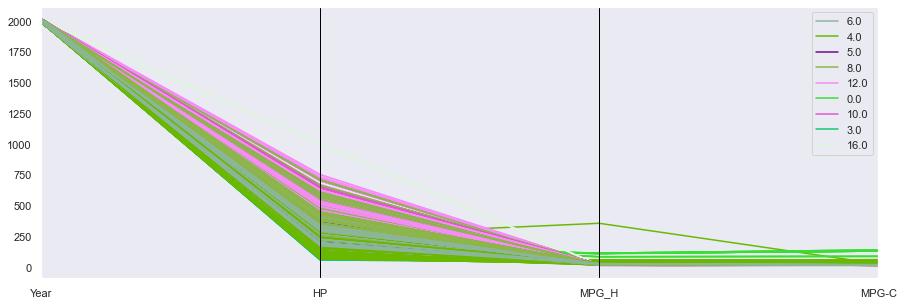

In [ ]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,5))

#complete the code



from the above plot we can see that mostly Cylinder 4 is majorly spread in MPG_H and MPG_C. HP variable shows some growth w.r.t year and goes constant for MPG_H and MPG-C.



## 4.  Heatmaps

Reference:- https://www.youtube.com/watch?v=ZSwXRn50lnA

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information

<p style='text-align: right;'> 20 points</p>
Using heatmaps plot the correlation between the features present in the dataset.

In [ ]:
#find the correlation of features of the data df


,Year,HP,Cylinders,MPG_H,MPG-C,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG_H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG-C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


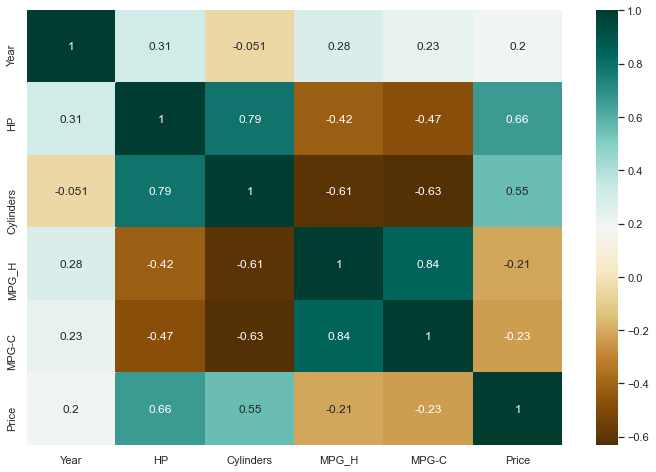

In [ ]:
# Using the correlated df, plot the heatmap 
# set cmap = 'BrBG', annot = True - to get the same graph as shown below 
# set size of graph = (12,8)



 The above heatmap plot shows correlation between various variables in the colored scale of -1 to 1. 

Amazing work done ! you have really made eye catchy visualization plots so far.
Did you felt its complicate to understand the above plot?. Hey smarty don't worry, in near assignments you will have enough practise to analyse and prepare insights from such plots that you will become pro in this field. 

Then soon you will be like below meme
![image.png](attachment:image.png)

---------------------------------

# Have a sweet cookie:) Congratulations! you have completed the 6th milestone challenge too. 

--------------------------------

# FeedBack
We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.

Please fill this feedback form  https://zfrmz.in/MtRG5oWXBdesm6rmSM7N

-----------------------------------